![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Construcción e implementación de árboles de decisión y métodos de ensamblaje

En este taller podrá poner en práctica los sus conocimientos sobre construcción e implementación de árboles de decisión y métodos de ensamblajes. El taller está constituido por 9 puntos, 5 relacionados con árboles de decisión (parte A) y 4 con métodos de ensamblaje (parte B).

## Parte A - Árboles de decisión

En esta parte del taller se usará el conjunto de datos de Capital Bikeshare de Kaggle, donde cada observación representa el alquiler de bicicletas durante una hora y día determinado. Para más detalles puede visitar los siguientes enlaces: [datos](https://archive.ics.uci.edu/ml/machine-learning-databases/00275/Bike-Sharing-Dataset.zip), [dicccionario de datos](https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset#).

### Datos prestamo de bicicletas

In [10]:
import warnings
warnings.filterwarnings('ignore')

In [11]:
# Importación de librerías
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, export_graphviz
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import VotingClassifier

In [12]:
# Lectura de la información de archivo .csv
bikes = pd.read_csv('https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2023/main/datasets/bikeshare.csv', index_col='datetime', parse_dates=True)

# Renombrar variable "count" a "total"
bikes.rename(columns={'count':'total'}, inplace=True)

# Crear la hora como una variable 
bikes['hour'] = bikes.index.hour

# Visualización de los datos
bikes.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,hour
datetime,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4


### Punto 1 - Análisis descriptivo

Ejecute las celdas 1.1 y 1.2. A partir de los resultados realice un análisis descriptivo sobre las variables "season" y "hour", escriba sus inferencias sobre los datos. Para complementar su análisis puede usar métricas como máximo, mínimo, percentiles entre otros.

In [13]:
# Celda 1.1
bikes.groupby('season').total.mean()

season
1    116.343261
2    215.251372
3    234.417124
4    198.988296
Name: total, dtype: float64

In [14]:
bikes.season.describe()

count    10886.000000
mean         2.506614
std          1.116174
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max          4.000000
Name: season, dtype: float64

Se observa que en la epoca de verano hay un mayor alquiler de bicicletas con un promedio de 234, seguida de primavera con un promedio de 215 bicicletas alquiladas. Como era de esperarse la estación del año con menor alquiler de bicicletas es invierno con un promedio de 116.

Al ser una variable categorica las estadisticas de variación no aportan mucha información.

In [15]:
# Celda 1.2
bikes.groupby('hour').total.mean()

hour
0      55.138462
1      33.859031
2      22.899554
3      11.757506
4       6.407240
5      19.767699
6      76.259341
7     213.116484
8     362.769231
9     221.780220
10    175.092308
11    210.674725
12    256.508772
13    257.787281
14    243.442982
15    254.298246
16    316.372807
17    468.765351
18    430.859649
19    315.278509
20    228.517544
21    173.370614
22    133.576754
23     89.508772
Name: total, dtype: float64

Se observa que las horas con mayor flujo de alquiler son las 8, 17 y 18 horas, sin embargo, las horas de la tarde son los que mayores picos de uso.

### Punto 2 - Análisis de gráficos

Primero ejecute la celda 2.1 y asegúrese de comprender el código y el resultado. Luego, en cada una de celdas 2.2 y 2.3 escriba un código que genere una gráfica del número de bicicletas rentadas promedio para cada valor de la variable "hour" (hora) cuando la variable "season" es igual a 1 (invierno) e igual a 3 (verano), respectivamente. Analice y escriba sus hallazgos.

<Axes: xlabel='hour'>

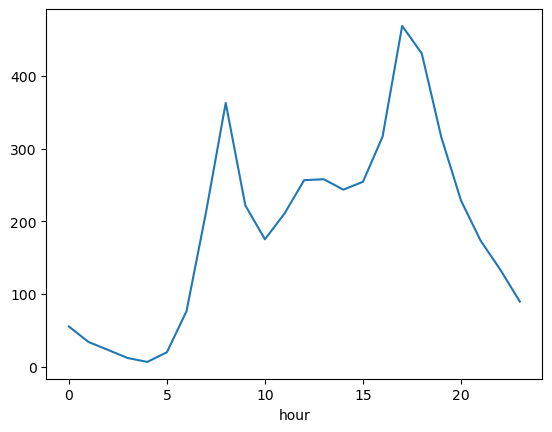

In [16]:
# Celda 2.1 - rentas promedio para cada valor de la variable "hour"
bikes.groupby('hour').total.mean().plot()

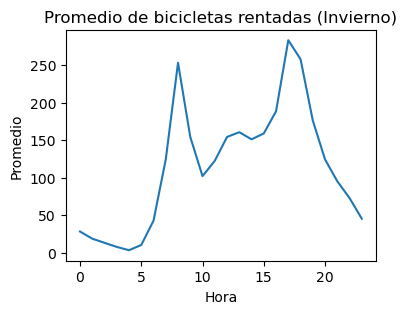

In [17]:
# Celda 2.2 - "season"=1 escriba su código y hallazgos 

# Filtro para season=1
bikes_season_1 = bikes[bikes['season'] == 1]
mean_total_by_hour_S1 = bikes_season_1.groupby('hour')['total'].mean()

# Graficar
plt.figure(figsize=(4, 3))
mean_total_by_hour_S1.plot()
plt.xlabel('Hora')
plt.ylabel('Promedio')
plt.title('Promedio de bicicletas rentadas (Invierno)')
plt.show()

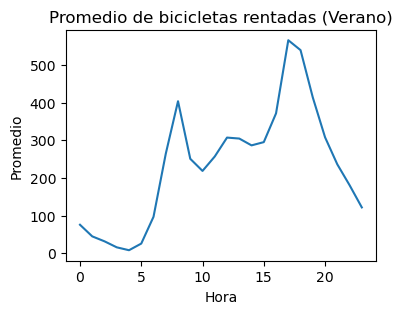

In [18]:
# Celda 2.3 - "season"=3 escriba su código y hallazgos 

# Filtro para season=3
bikes_season_3 = bikes[bikes['season'] == 3]
mean_total_by_hour_S3 = bikes_season_3.groupby('hour')['total'].mean()

# Graficar
plt.figure(figsize=(4, 3))
mean_total_by_hour_S3.plot()
plt.xlabel('Hora')
plt.ylabel('Promedio')
plt.title('Promedio de bicicletas rentadas (Verano)')
plt.show()

Como se observa en las gráficas la distribución para las distintas estaciones observadas es muy similar practicamente la misma, con picos de uso a las 8, 17 y 18 horas. Es decir la distribución es la misma en cuanto a tendencias pero, en magnitudes el valor promedio de alquiler varia.

### Punto 3 - Regresión lineal
En la celda 3 ajuste un modelo de regresión lineal a todo el conjunto de datos, utilizando "total" como variable de respuesta y "season" y "hour" como las únicas variables predictoras, teniendo en cuenta que la variable "season" es categórica. Luego, imprima los coeficientes e interprételos. ¿Cuáles son las limitaciones de la regresión lineal en este caso?

In [19]:
# Celda 3

# Crear variables dummy para la variable categórica "season"
bikes_2 = pd.get_dummies(bikes, columns=['season'], drop_first=True)

X = bikes_2[['hour', 'season_2', 'season_3', 'season_4']]
y = bikes_2['total']

# Inicializar el modelo de regresión lineal
model = LinearRegression()

# Ajustar el modelo a los datos
model.fit(X, y)

# Imprimir los coeficientes
print('Coeficientes:', model.coef_)

# Interpretación de los coeficientes
print('Intercepto:', model.intercept_)
print('Coeficiente de la hora:', model.coef_[0])
print('Coeficiente de la temporada 2:', model.coef_[1])
print('Coeficiente de la temporada 3:', model.coef_[2])
print('Coeficiente de la temporada 4:', model.coef_[3])


Coeficientes: [ 10.54520609 100.31723192 119.46754995  84.08311787]
Intercepto: -6.430262462305961
Coeficiente de la hora: 10.545206094069895
Coeficiente de la temporada 2: 100.31723191606571
Coeficiente de la temporada 3: 119.46754994593176
Coeficiente de la temporada 4: 84.08311787296776


In [20]:
# Realiza las predicciones
y_pred = model.predict(X)

# Calcula el R^2
r2 = r2_score(y, y_pred)

# Número de observaciones
n = len(y)

# Número de variables predictoras
p = X.shape[1]

# Calcula el R^2 ajustado
r2_adjusted_RL = 1 - (1 - r2) * ((n - 1) / (n - p - 1))

print("R^2 ajustado:", r2_adjusted_RL)

R^2 ajustado: 0.2231079081517925


**Interpretación de parametros**

* Coeficiente hora: Manteniendo constantes las otras variables en el modelo, por cada unidad de aumento en la hora del día, el número esperado de bicicletas alquiladas aumenta en promedio en aproximadamente 10.55 unidades.
* Coeficiente de la temporada 2: En comparación con la temporada 1 (categoría de referencia), se espera que el número esperado de bicicletas alquiladas aumente en promedio en aproximadamente 100.32 unidades durante la temporada 2, manteniendo constantes las otras variables en el modelo.
* Coeficiente de la temporada 3: En comparación con la temporada 1 (categoría de referencia), se espera que el número esperado de bicicletas alquiladas aumente en promedio en aproximadamente 119.46 unidades durante la temporada 2, manteniendo constantes las otras variables en el modelo.
* Coeficiente de la temporada 3: En comparación con la temporada 1 (categoría de referencia), se espera que el número esperado de bicicletas alquiladas aumente en promedio en aproximadamente 84.083 unidades durante la temporada 2, manteniendo constantes las otras variables en el modelo.

**Limitaciones de la regresión lineal**

La resgresión lineal en sí es un modelo que se ve muy afectado a valores atipicos. Dado que tenemos variables categoricas se hace necesario quedar una variable adicional para cada una de las categorias contenidas en la variable y esto puede generar una perdida en la potencia del modelo a la hora de predecir. En este caso no hemos verificado el supuesto de normalidad, lo cual es uno de los requisitos al usar este tipo de modelos, esto también aplica para el supuesto de errores independientes.

### Punto 4 - Árbol de decisión manual
En la celda 4 cree un árbol de decisiones para pronosticar la variable "total" iterando **manualmente** sobre las variables "hour" y  "season". El árbol debe tener al menos 6 nodos finales.

In [21]:
# Celda 4
X = bikes[['hour', 'season']]
y = bikes['total']

max_depth = None
num_pct = 10
max_features = None
min_gain=0.001

In [22]:
def gini(y):
    if y.shape[0] == 0:
        return 0
    else:
        return 1 - (y.mean()**2 + (1 - y.mean())**2)

In [23]:
def gini_impurity(X_col, y, split):
    
    filter_l = X_col < split
    y_l = y.loc[filter_l]
    y_r = y.loc[~filter_l]
    
    n_l = y_l.shape[0]
    n_r = y_r.shape[0]
    
    gini_y = gini(y)
    gini_l = gini(y_l)
    gini_r = gini(y_r)
    
    gini_impurity_ = gini_y - (n_l / (n_l + n_r) * gini_l + n_r / (n_l + n_r) * gini_r)
    
    return gini_impurity_

In [24]:
def best_split(X, y, num_pct=10):
    
    features = range(X.shape[1])
    
    best_split = [0, 0, 0]  # j, split, gain
    
    # Para todas las varibles 
    for j in features:
        
        splits = np.percentile(X.iloc[:, j], np.arange(0, 100, 100.0 / (num_pct+1)).tolist())
        splits = np.unique(splits)[1:]
        
        # Para cada partición
        for split in splits:
            gain = gini_impurity(X.iloc[:, j], y, split)
                        
            if gain > best_split[2]:
                best_split = [j, split, gain]
    
    return best_split

In [25]:
# Definición de la función tree_grow para hacer un crecimiento recursivo del árbol
def tree_grow(X, y, level=0, min_gain=0.001, max_depth=None, num_pct=10):
    
    # Si solo es una observación
    if X.shape[0] == 1:
        tree = dict(y_pred=y.iloc[:1].values[0], y_prob=0.5, level=level, split=-1, n_samples=1, gain=0)
        return tree
    
    # Calcular la mejor división
    j, split, gain = best_split(X, y, num_pct)
    
    # Guardar el árbol y estimar la predicción
    y_pred = int(y.mean() >= 0.5) 
    y_prob = (y.sum() + 1.0) / (y.shape[0] + 2.0)  # Corrección Laplace 
    
    tree = dict(y_pred=y_pred, y_prob=y_prob, level=level, split=-1, n_samples=X.shape[0], gain=gain)
    # Revisar el criterio de parada 
    if gain < min_gain:
        return tree
    if max_depth is not None:
        if level >= max_depth:
            return tree   
    
    # Continuar creando la partición
    filter_l = X.iloc[:, j] < split
    X_l, y_l = X.loc[filter_l], y.loc[filter_l]
    X_r, y_r = X.loc[~filter_l], y.loc[~filter_l]
    tree['split'] = [j, split]

    # Siguiente iteración para cada partición
    
    tree['sl'] = tree_grow(X_l, y_l, level + 1, min_gain=min_gain, max_depth=max_depth, num_pct=num_pct)
    tree['sr'] = tree_grow(X_r, y_r, level + 1, min_gain=min_gain, max_depth=max_depth, num_pct=num_pct)
    
    return tree

In [26]:
tree_grow(X, y, level=0, min_gain=0.001, max_depth=6, num_pct=10)

{'y_pred': 1,
 'y_prob': 191.53903379867745,
 'level': 0,
 'split': [0, 8.0],
 'n_samples': 10886,
 'gain': 18268.811823533004,
 'sl': {'y_pred': 1,
  'y_prob': 55.40711902113459,
  'level': 1,
  'split': [0, 7.0],
  'n_samples': 3594,
  'gain': 7207.700659959655,
  'sl': {'y_pred': 1,
   'y_prob': 32.561604584527224,
   'level': 2,
   'split': [0, 6.0],
   'n_samples': 3139,
   'gain': 646.8008927589567,
   'sl': {'y_pred': 1,
    'y_prob': 25.15934475055845,
    'level': 3,
    'split': [0, 2.0],
    'n_samples': 2684,
    'gain': 382.8088308604629,
    'sl': {'y_pred': 1,
     'y_prob': 44.41383095499451,
     'level': 4,
     'split': [1, 2.0],
     'n_samples': 909,
     'gain': 291.4004681825131,
     'sl': {'y_pred': 1,
      'y_prob': 23.32456140350877,
      'level': 5,
      'split': [0, 1.0],
      'n_samples': 226,
      'gain': 45.41972746495435,
      'sl': {'y_pred': 1,
       'y_prob': 27.808695652173913,
       'level': 6,
       'split': -1,
       'n_samples': 113,
 

### Punto 5 - Árbol de decisión con librería
En la celda 5 entrene un árbol de decisiones con la **librería sklearn**, usando las variables predictoras "season" y "hour" y calibre los parámetros que considere conveniente para obtener un mejor desempeño. Recuerde dividir los datos en conjuntos de entrenamiento y validación para esto. Comente el desempeño del modelo con alguna métrica de desempeño de modelos de regresión y compare desempeño con el modelo del punto 3.

In [27]:
# Celda 5

X = bikes[['hour', 'season']]
y = bikes['total']

# Entramiento y validacion
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializar el modelo de árbol de decisiones
tree_model = DecisionTreeRegressor(random_state=42)

# Entrenar el modelo
tree_model.fit(X_train, y_train)

# Predecir en el conjunto de validación
y_pred = tree_model.predict(X_val)

In [28]:
r2 = r2_score(y_val, y_pred)

# Número de observaciones
n = len(y_val)

# Número de variables predictoras
p = X_val.shape[1]

# Calcula el R^2 ajustado
r2_adjusted = 1 - (1 - r2) * ((n - 1) / (n - p - 1))

print("R^2 ajustado Arbol de decision:", r2_adjusted)
print("R^2 ajustado Regresion lienal:", r2_adjusted_RL)

R^2 ajustado Arbol de decision: 0.5920108117667011
R^2 ajustado Regresion lienal: 0.2231079081517925


Se observa un mayor ajuste en el arbol de decisión con un R ajustado del 59% comparado con el r ajustado del 22% para el modelo de regresión lineal

## Parte B - Métodos de ensamblajes
En esta parte del taller se usará el conjunto de datos de Popularidad de Noticias Online. El objetivo es predecir si la notica es popular o no, la popularidad está dada por la cantidad de reacciones en redes sociales. Para más detalles puede visitar el siguiente enlace: [datos](https://archive.ics.uci.edu/ml/datasets/online+news+popularity).

### Datos popularidad de noticias

In [29]:
# Lectura de la información de archivo .csv
df = pd.read_csv('https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2023/main/datasets/mashable.csv', index_col=0)
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,Popular
0,http://mashable.com/2014/12/10/cia-torture-rep...,28.0,9.0,188.0,0.732620,1.0,0.844262,5.0,1.0,1.0,...,0.200000,0.80,-0.487500,-0.60,-0.250000,0.9,0.8,0.4,0.8,1
1,http://mashable.com/2013/10/18/bitlock-kicksta...,447.0,7.0,297.0,0.653199,1.0,0.815789,9.0,4.0,1.0,...,0.160000,0.50,-0.135340,-0.40,-0.050000,0.1,-0.1,0.4,0.1,0
2,http://mashable.com/2013/07/24/google-glass-po...,533.0,11.0,181.0,0.660377,1.0,0.775701,4.0,3.0,1.0,...,0.136364,1.00,0.000000,0.00,0.000000,0.3,1.0,0.2,1.0,0
3,http://mashable.com/2013/11/21/these-are-the-m...,413.0,12.0,781.0,0.497409,1.0,0.677350,10.0,3.0,1.0,...,0.100000,1.00,-0.195701,-0.40,-0.071429,0.0,0.0,0.5,0.0,0
4,http://mashable.com/2014/02/11/parking-ticket-...,331.0,8.0,177.0,0.685714,1.0,0.830357,3.0,2.0,1.0,...,0.100000,0.55,-0.175000,-0.25,-0.100000,0.0,0.0,0.5,0.0,0


In [30]:
# Definición variable de interes y variables predictoras
X = df.drop(['url', 'Popular'], axis=1)
y = df['Popular']
y.mean()

0.5

In [31]:
# División de la muestra en set de entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

### Punto 6 - Árbol de decisión y regresión logística
En la celda 6 construya un árbol de decisión y una regresión logística. Para el árbol calibre al menos un parámetro y evalúe el desempeño de cada modelo usando las métricas de Accuracy y F1-Score.

In [32]:
# Celda 6
# Arbol de decisión
tree_model = DecisionTreeClassifier(random_state=42, max_depth=4)

# Entrenar el modelo con arbol de decisión
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)
accuracy_tree = accuracy_score(y_test, y_pred_tree)
f1_tree = f1_score(y_test, y_pred_tree)

# # Regresion logistica
log_reg_model = LogisticRegression()

# # Entrenar el modelo con regresion logistica
log_reg_model.fit(X_train, y_train)
y_pred_RL = log_reg_model.predict(X_test)
accuracy_RL = accuracy_score(y_test, y_pred_RL)
f1_RL = f1_score(y_test, y_pred_RL)

print("Accuracy del Arbol:", accuracy_tree)
print("F1-score del arbol:", f1_tree)
print("Accuracy de regresión logistica:", accuracy_RL)
print("F1-score de regresión logistica:", f1_RL)

# # Predecir en el conjunto de validación
# y_pred = tree_model.predict(X_val)

Accuracy del Arbol: 0.6513333333333333
F1-score del arbol: 0.6345213137665969
Accuracy de regresión logistica: 0.6146666666666667
F1-score de regresión logistica: 0.6110363391655451


En base a las metricas presentadas el arbol de decisión (con un maximo de profundidad de 4) tiene un resultado ligeramente superior a los presentados con el modelo de regresión logistica. 

### Punto 7 - Votación Mayoritaria
En la celda 7 elabore un esamble con la metodología de **Votación mayoritaria** compuesto por 300 muestras bagged donde:

-las primeras 100 muestras vienen de árboles de decisión donde max_depth tome un valor de su elección\
-las segundas 100 muestras vienen de árboles de decisión donde min_samples_leaf tome un valor de su elección\
-las últimas 100 muestras vienen de regresiones logísticas

Evalúe cada uno de los tres modelos de manera independiente utilizando las métricas de Accuracy y F1-Score, luego evalúe el ensamble de modelos y compare los resultados. 

Nota: 

Para este ensamble de 300 modelos, deben hacer votación mayoritaria. Esto lo pueden hacer de distintas maneras. La más "fácil" es haciendo la votación "manualmente", como se hace a partir del minuto 5:45 del video de Ejemplo práctico de emsablajes en Coursera. Digo que es la más fácil porque si hacen la votación mayoritaria sobre las 300 predicciones van a obtener lo que se espera.

Otra opción es: para cada uno de los 3 tipos de modelos, entrenar un ensamble de 100 modelos cada uno. Predecir para cada uno de esos tres ensambles y luego predecir como un ensamble de los 3 ensambles. La cuestión es que la votación mayoritaria al usar los 3 ensambles no necesariamente va a generar el mismo resultado que si hacen la votación mayoritaria directamente sobre los 300 modelos. Entonces, para los que quieran hacer esto, deben hacer ese último cálculo con cuidado.

Para los que quieran hacerlo como ensamble de ensambles, digo que se debe hacer el ensamble final con cuidado por lo siguiente. Supongamos que:

* para los 100 árboles del primer tipo, la votación mayoritaria es: 55% de los modelos predicen que la clase de una observación es "1"
* para los 100 árboles del segundo tipo, la votación mayoritaria es: 55% de los modelos predicen que la clase de una observación es "1"
* para las 100 regresiones logísticas, la votación mayoritaria es: 10% de los modelos predicen que la clase de una observación es "1"

Si se hace la votación mayoritaria de los 300 modelos, la predicción de esa observación debería ser: (100*55%+100*55%+100*10%)/300 = 40% de los modelos votan porque la predicción debería ser "1". Es decir, la predicción del ensamble es "0" (dado que menos del 50% de modelos predijo un 1).

Sin embargo, si miramos cada ensamble por separado, el primer ensamble predice "1", el segundo ensamble predice "1" y el último ensamble predice "0". Si hago votación mayoritaria sobre esto, la predicción va a ser "1", lo cual es distinto a si se hace la votación mayoritaria sobre los 300 modelos.

In [33]:
# Celda 7

# Crear y entrenar modelos individuales
models = []

# Árboles de decisión con diferentes max_depth
for _ in range(100):
    max_depth = np.random.randint(3, 10)  # Elije un valor de max_depth al azar entre 3 y 10
    tree_model = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    models.append(tree_model)

# Árboles de decisión con diferentes min_samples_leaf
for _ in range(100):
    min_samples_leaf = np.random.randint(1, 5)  # Elije un valor de min_samples_leaf al azar entre 1 y 5
    tree_model = DecisionTreeClassifier(min_samples_leaf=min_samples_leaf, random_state=42)
    models.append(tree_model)

# Regresiones logísticas
for _ in range(100):
    log_reg_model = LogisticRegression(random_state=42)
    models.append(log_reg_model)

# Entrenar modelos individuales
for model in models:
    model.fit(X_train, y_train)

# Evaluar modelos individuales
for i, model in enumerate(models):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    print(f"Modelo {i+1}: Accuracy = {accuracy}, F1-score = {f1}")

# Crear el ensamble utilizando la metodología de Votación Mayoritaria
ensemble_model = VotingClassifier(estimators=[('tree_' + str(i+1), model) for i, model in enumerate(models)], voting='hard')

# Entrenar el ensamble
ensemble_model.fit(X_train, y_train)

# Evaluar el ensamble
y_pred_ensemble = ensemble_model.predict(X_test)
accuracy_ensemble = accuracy_score(y_test, y_pred_ensemble)
f1_ensemble = f1_score(y_test, y_pred_ensemble)

print("\nEnsamble - Votación Mayoritaria:")
print(f"Accuracy = {accuracy_ensemble}, F1-score = {f1_ensemble}")


Modelo 1: Accuracy = 0.6513333333333333, F1-score = 0.6345213137665969
Modelo 2: Accuracy = 0.6513333333333333, F1-score = 0.6345213137665969
Modelo 3: Accuracy = 0.608, F1-score = 0.630188679245283
Modelo 4: Accuracy = 0.6253333333333333, F1-score = 0.6223118279569892
Modelo 5: Accuracy = 0.6413333333333333, F1-score = 0.6072992700729928
Modelo 6: Accuracy = 0.6213333333333333, F1-score = 0.6368286445012787
Modelo 7: Accuracy = 0.64, F1-score = 0.6633416458852869
Modelo 8: Accuracy = 0.64, F1-score = 0.6633416458852869
Modelo 9: Accuracy = 0.6213333333333333, F1-score = 0.6368286445012787
Modelo 10: Accuracy = 0.6513333333333333, F1-score = 0.6345213137665969
Modelo 11: Accuracy = 0.6513333333333333, F1-score = 0.6345213137665969
Modelo 12: Accuracy = 0.6213333333333333, F1-score = 0.6368286445012787
Modelo 13: Accuracy = 0.6213333333333333, F1-score = 0.6368286445012787
Modelo 14: Accuracy = 0.6253333333333333, F1-score = 0.6223118279569892
Modelo 15: Accuracy = 0.6513333333333333, F

Modelo 132: Accuracy = 0.5526666666666666, F1-score = 0.5493619879113499
Modelo 133: Accuracy = 0.548, F1-score = 0.5425101214574899
Modelo 134: Accuracy = 0.5406666666666666, F1-score = 0.5409726848767488
Modelo 135: Accuracy = 0.5526666666666666, F1-score = 0.5493619879113499
Modelo 136: Accuracy = 0.548, F1-score = 0.5425101214574899
Modelo 137: Accuracy = 0.5526666666666666, F1-score = 0.5493619879113499
Modelo 138: Accuracy = 0.5406666666666666, F1-score = 0.5409726848767488
Modelo 139: Accuracy = 0.5526666666666666, F1-score = 0.5493619879113499
Modelo 140: Accuracy = 0.548, F1-score = 0.5425101214574899
Modelo 141: Accuracy = 0.548, F1-score = 0.5425101214574899
Modelo 142: Accuracy = 0.5526666666666666, F1-score = 0.5493619879113499
Modelo 143: Accuracy = 0.55, F1-score = 0.5411284840244732
Modelo 144: Accuracy = 0.5406666666666666, F1-score = 0.5409726848767488
Modelo 145: Accuracy = 0.55, F1-score = 0.5411284840244732
Modelo 146: Accuracy = 0.5406666666666666, F1-score = 0.54

Modelo 258: Accuracy = 0.6146666666666667, F1-score = 0.6110363391655451
Modelo 259: Accuracy = 0.6146666666666667, F1-score = 0.6110363391655451
Modelo 260: Accuracy = 0.6146666666666667, F1-score = 0.6110363391655451
Modelo 261: Accuracy = 0.6146666666666667, F1-score = 0.6110363391655451
Modelo 262: Accuracy = 0.6146666666666667, F1-score = 0.6110363391655451
Modelo 263: Accuracy = 0.6146666666666667, F1-score = 0.6110363391655451
Modelo 264: Accuracy = 0.6146666666666667, F1-score = 0.6110363391655451
Modelo 265: Accuracy = 0.6146666666666667, F1-score = 0.6110363391655451
Modelo 266: Accuracy = 0.6146666666666667, F1-score = 0.6110363391655451
Modelo 267: Accuracy = 0.6146666666666667, F1-score = 0.6110363391655451
Modelo 268: Accuracy = 0.6146666666666667, F1-score = 0.6110363391655451
Modelo 269: Accuracy = 0.6146666666666667, F1-score = 0.6110363391655451
Modelo 270: Accuracy = 0.6146666666666667, F1-score = 0.6110363391655451
Modelo 271: Accuracy = 0.6146666666666667, F1-score

Para los primeros 100 modelos se encuentra algunos con modelos con 65% de accuracy con 63% de F1 score, mientras que para los modelos del 200 al 300 ninguno supera la barrera de 61% con f1 score del mismo valor. El ensamblaje nos muestra un acucuracy del 62% con un f1-score del mismo valor. Hay posibilidades de tener un mejor ajuste con los modelos en los que ajustamos el parametro "min_samples_leaf" pues este modelo presenta unos resultados muy bajos y puede ser el causante que el no presente mejores resultados

### Punto 8 - Votación Ponderada
En la celda 8 elabore un ensamble con la metodología de **Votación ponderada** compuesto por 300 muestras bagged para los mismos tres escenarios del punto 7. Evalúe los modelos utilizando las métricas de Accuracy y F1-Score

In [34]:
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
import numpy as np

# Supongamos que ya tienes los conjuntos de entrenamiento y prueba X_train, X_test, y_train, y_test

# Crear y entrenar modelos individuales
models = []

# Árboles de decisión con diferentes max_depth
for i in range(100):
    max_depth = np.random.randint(3, 10)  # Elije un valor de max_depth al azar entre 3 y 10
    tree_model = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    models.append(('tree_' + str(i+1), tree_model))

# Árboles de decisión con diferentes min_samples_leaf
for i in range(100):
    min_samples_leaf = np.random.randint(1, 5)  # Elije un valor de min_samples_leaf al azar entre 1 y 5
    tree_model = DecisionTreeClassifier(min_samples_leaf=min_samples_leaf, random_state=42)
    models.append(('tree_' + str(i+101), tree_model))

# Regresiones logísticas
for i in range(100):
    log_reg_model = LogisticRegression(random_state=42)
    models.append(('log_reg_' + str(i+1), log_reg_model))

# Entrenar modelos individuales
for _, model in models:
    model.fit(X_train, y_train)

# Evaluar modelos individuales
for name, model in models:
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    print(f"Modelo {name}: Accuracy = {accuracy}, F1-score = {f1}")

# Crear el ensamble utilizando la metodología de Votación Ponderada
ensemble_model = VotingClassifier(estimators=models, voting='soft')

# Entrenar el ensamble
ensemble_model.fit(X_train, y_train)

# Evaluar el ensamble
y_pred_ensemble = ensemble_model.predict(X_test)
accuracy_ensemble = accuracy_score(y_test, y_pred_ensemble)
f1_ensemble = f1_score(y_test, y_pred_ensemble)

print("\nEnsamble - Votación Ponderada:")
print(f"Accuracy = {accuracy_ensemble}, F1-score = {f1_ensemble}")


Modelo tree_1: Accuracy = 0.6013333333333334, F1-score = 0.617157490396927
Modelo tree_2: Accuracy = 0.6213333333333333, F1-score = 0.6368286445012787
Modelo tree_3: Accuracy = 0.608, F1-score = 0.630188679245283
Modelo tree_4: Accuracy = 0.6253333333333333, F1-score = 0.6223118279569892
Modelo tree_5: Accuracy = 0.6413333333333333, F1-score = 0.6072992700729928
Modelo tree_6: Accuracy = 0.6413333333333333, F1-score = 0.6072992700729928
Modelo tree_7: Accuracy = 0.6413333333333333, F1-score = 0.6072992700729928
Modelo tree_8: Accuracy = 0.6013333333333334, F1-score = 0.617157490396927
Modelo tree_9: Accuracy = 0.6013333333333334, F1-score = 0.617157490396927
Modelo tree_10: Accuracy = 0.6013333333333334, F1-score = 0.617157490396927
Modelo tree_11: Accuracy = 0.64, F1-score = 0.6633416458852869
Modelo tree_12: Accuracy = 0.6253333333333333, F1-score = 0.6223118279569892
Modelo tree_13: Accuracy = 0.6013333333333334, F1-score = 0.617157490396927
Modelo tree_14: Accuracy = 0.64, F1-score

Modelo tree_123: Accuracy = 0.5406666666666666, F1-score = 0.5409726848767488
Modelo tree_124: Accuracy = 0.5526666666666666, F1-score = 0.5493619879113499
Modelo tree_125: Accuracy = 0.5526666666666666, F1-score = 0.5493619879113499
Modelo tree_126: Accuracy = 0.55, F1-score = 0.5411284840244732
Modelo tree_127: Accuracy = 0.5526666666666666, F1-score = 0.5493619879113499
Modelo tree_128: Accuracy = 0.5526666666666666, F1-score = 0.5493619879113499
Modelo tree_129: Accuracy = 0.5406666666666666, F1-score = 0.5409726848767488
Modelo tree_130: Accuracy = 0.55, F1-score = 0.5411284840244732
Modelo tree_131: Accuracy = 0.5526666666666666, F1-score = 0.5493619879113499
Modelo tree_132: Accuracy = 0.5526666666666666, F1-score = 0.5493619879113499
Modelo tree_133: Accuracy = 0.5406666666666666, F1-score = 0.5409726848767488
Modelo tree_134: Accuracy = 0.5526666666666666, F1-score = 0.5493619879113499
Modelo tree_135: Accuracy = 0.548, F1-score = 0.5425101214574899
Modelo tree_136: Accuracy =

Modelo log_reg_46: Accuracy = 0.6146666666666667, F1-score = 0.6110363391655451
Modelo log_reg_47: Accuracy = 0.6146666666666667, F1-score = 0.6110363391655451
Modelo log_reg_48: Accuracy = 0.6146666666666667, F1-score = 0.6110363391655451
Modelo log_reg_49: Accuracy = 0.6146666666666667, F1-score = 0.6110363391655451
Modelo log_reg_50: Accuracy = 0.6146666666666667, F1-score = 0.6110363391655451
Modelo log_reg_51: Accuracy = 0.6146666666666667, F1-score = 0.6110363391655451
Modelo log_reg_52: Accuracy = 0.6146666666666667, F1-score = 0.6110363391655451
Modelo log_reg_53: Accuracy = 0.6146666666666667, F1-score = 0.6110363391655451
Modelo log_reg_54: Accuracy = 0.6146666666666667, F1-score = 0.6110363391655451
Modelo log_reg_55: Accuracy = 0.6146666666666667, F1-score = 0.6110363391655451
Modelo log_reg_56: Accuracy = 0.6146666666666667, F1-score = 0.6110363391655451
Modelo log_reg_57: Accuracy = 0.6146666666666667, F1-score = 0.6110363391655451
Modelo log_reg_58: Accuracy = 0.61466666

En este caso el ensamblaje bajo en accuracy y un f1-escore de 58%. Con redimientos muy inferiores a los mostrados para los modelos generados. Probablemente arrastrado por el modelo en donde cambiamos el parametro "min_samples_leaf".

### Punto 9 - Comparación y análisis de resultados
En la celda 9 comente sobre los resultados obtenidos con las metodologías usadas en los puntos 7 y 8, compare los resultados y enuncie posibles ventajas o desventajas de cada una de ellas.

Como se observa en las metricas anteriores el ensamblaje por votación mayoritaria presento resultados mejores en cuanto a f1- score y accuracy. Como ventajas que se pueden observar el modelo votación ponderada parece tener mayor afectación si alguno de los modelos usados tiene un resultado con metricas muy pobres, mientras el modelo por votación mayoritaria es se afecto menos por esta situación.